In [2]:
import uproot

In [3]:
filename = "tracksters_ds.root"
complete_ds = {filename: "tracksters/complete"}
incomplete_ds = {filename: "tracksters/incomplete"}
complete = uproot.open(complete_ds)
incomplete = uproot.open(incomplete_ds)

In [4]:
complete.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nvertices_x          | int32_t                  | AsDtype('>i4')
vertices_x           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_y          | int32_t                  | AsDtype('>i4')
vertices_y           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_z          | int32_t                  | AsDtype('>i4')
vertices_z           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_energy     | int32_t                  | AsDtype('>i4')
vertices_energy      | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_indexes    | int32_t                  | AsDtype('>i4')
vertices_indexes     | int64_t[]                | AsJagged(AsDtype('>i8'))


In [5]:
cx = complete["vertices_x"].array()
cy = complete["vertices_y"].array()
cz = complete["vertices_z"].array()
ce = complete["vertices_energy"].array()

ix = incomplete["vertices_x"].array()
iy = incomplete["vertices_y"].array()
iz = incomplete["vertices_z"].array()
ie = incomplete["vertices_energy"].array()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

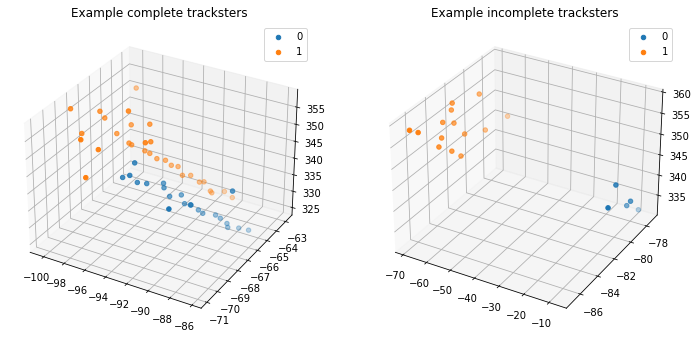

In [7]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(121, projection='3d')
tids = [0, 1]
for tid in tids:
    ax.scatter(cx[tid], cy[tid], cz[tid], label=tid)
ax.set_title(f"Example complete tracksters")
ax.legend()

ax = fig.add_subplot(122, projection='3d')
tids = [0, 1]
for tid in tids:
    ax.scatter(ix[tid], iy[tid], iz[tid], label=tid)
ax.set_title(f"Example incomplete tracksters")
ax.legend()

In [20]:
ce_nvertices = [len(x) for x in ce]
ie_nvertices = [len(x) for x in ie]

ce_sum = [sum(x) for x in ce]
ie_sum = [sum(x) for x in ie]

(array([15.,  9.,  7.,  4., 11.,  3.,  4.,  3.,  1.,  1.]),
 array([0.74337052, 1.15411225, 1.56485398, 1.97559571, 2.38633744,
        2.79707916, 3.20782089, 3.61856262, 4.02930435, 4.44004608,
        4.85078781]),
 <BarContainer object of 10 artists>)

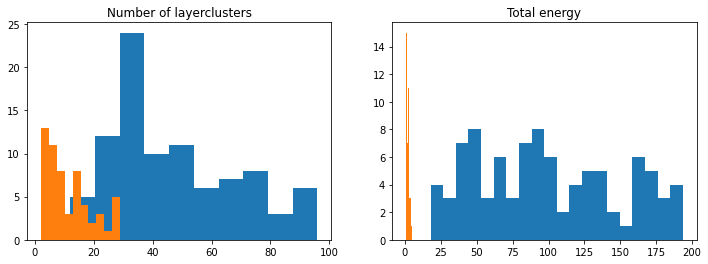

In [35]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.hist(ce_nvertices)
ax.hist(ie_nvertices)
ax.set_title("Number of layerclusters")
ax = fig.add_subplot(122)
ax.hist(ce_sum, bins=20)
ax.set_title("Total energy")
ax.hist(ie_sum)

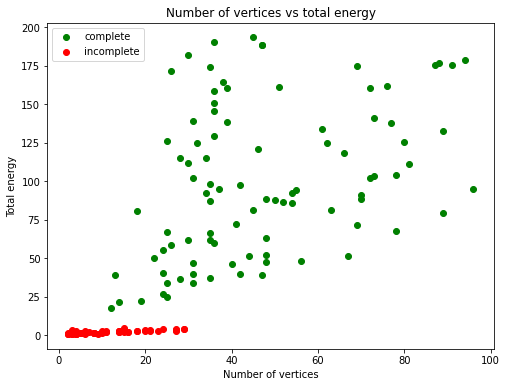

In [39]:
plt.figure(figsize=(8, 6))
plt.title("Number of vertices vs total energy")
plt.xlabel("Number of vertices")
plt.ylabel("Total energy")
plt.scatter(ce_nvertices, ce_sum, color="green", label="complete")
plt.scatter(ie_nvertices, ie_sum, color="red", label="incomplete")
plt.legend()